<a href="https://colab.research.google.com/github/shinobu357/TugasMLRaisya/blob/main/Week%2010/Week_10_Raisya_Athaya_Kamilah_101032380253_Regression_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Hubungkan ke Google Drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
# Install PyTorch (Versi terbaru yang kompatibel dengan Google Colab)
!pip install torch torchvision torchaudio

# Install scikit-learn dan pandas untuk manipulasi data dan model
!pip install -U scikit-learn pandas matplotlib
!pip install openpyxl


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt




In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Week 10/Real estate valuation data set.xlsx")

# Tampilkan beberapa baris data
data.head()

# Drop kolom yang tidak diperlukan
data = data.drop(['X1 transaction date'], axis=1)  # Kolom 'X1 transaction date' tidak diperlukan

# Pisahkan fitur (X) dan target (Y)
features = data.drop(['Y house price of unit area'], axis=1)
target = data['Y house price of unit area']

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Pisahkan data menjadi training dan test set
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)


In [ ]:
class VanillaMLP(nn.Module):
    def __init__(self, input_dim, hidden_layers, neurons_per_layer, activation_function):
        super(VanillaMLP, self).__init__()
        self.hidden_layers = nn.ModuleList()

        # Input ke lapisan tersembunyi pertama
        self.hidden_layers.append(nn.Linear(input_dim, neurons_per_layer))

        # Lapisan tersembunyi lainnya
        for _ in range(hidden_layers - 1):
            self.hidden_layers.append(nn.Linear(neurons_per_layer, neurons_per_layer))

        # Output layer
        self.output_layer = nn.Linear(neurons_per_layer, 1)

        # Fungsi aktivasi
        self.activation = self.get_activation_function(activation_function)

    def get_activation_function(self, activation_function):
        if activation_function == 'ReLU':
            return nn.ReLU()
        elif activation_function == 'Sigmoid':
            return nn.Sigmoid()
        elif activation_function == 'Tanh':
            return nn.Tanh()
        elif activation_function == 'Softmax':
            return nn.Softmax(dim=1)  # Untuk multi-class classification (jika perlu)
        else:  # 'Linear'
            return nn.Identity()  # Tidak ada aktivasi untuk output layer (regresi)

    def forward(self, x):
        for layer in self.hidden_layers:
            x = self.activation(layer(x))
        return self.output_layer(x)


In [ ]:
def train_model(model, X_train, y_train, X_test, y_test, epochs, batch_size, lr):
    # Convert data ke tensor PyTorch
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

    # Tentukan loss function dan optimizer
    criterion = nn.MSELoss()  # Untuk regresi
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    # Latih model
    model.train()
    for epoch in range(epochs):
        permutation = torch.randperm(X_train_tensor.size()[0])
        for i in range(0, X_train_tensor.size()[0], batch_size):
            optimizer.zero_grad()
            indices = permutation[i:i+batch_size]
            batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]
            output = model(batch_x)
            loss = criterion(output, batch_y)
            loss.backward()
            optimizer.step()

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

    # Evaluasi model
    model.eval()
    with torch.no_grad():
        test_output = model(X_test_tensor)
        test_loss = criterion(test_output, y_test_tensor)
        print(f'Test Loss: {test_loss.item():.4f}')
        return test_loss.item()


In [ ]:
# Konfigurasi hyperparameters
hidden_layer_choices = [1, 2, 3]
neurons_per_layer_choices = [4, 8, 16, 32, 64]
activation_function_choices = ['Linear', 'Sigmoid', 'ReLU', 'Softmax', 'Tanh']
epoch_choices = [1, 10, 25, 50, 100, 250]
lr_choices = [10, 1, 0.1, 0.01, 0.001, 0.0001]
batch_size_choices = [16, 32, 64, 128, 256, 512]

results = []

# Iterasi semua kombinasi hyperparameters
for hidden_layers in hidden_layer_choices:
    for neurons_per_layer in neurons_per_layer_choices:
        for activation_function in activation_function_choices:
            for epochs in epoch_choices:
                for lr in lr_choices:
                    for batch_size in batch_size_choices:
                        print(f"Testing: Hidden Layers={hidden_layers}, Neurons={neurons_per_layer}, Activation={activation_function}, Epochs={epochs}, LR={lr}, Batch Size={batch_size}")

                        # Membuat model dengan hyperparameter saat ini
                        model = VanillaMLP(input_dim=X_train.shape[1],
                                            hidden_layers=hidden_layers,
                                            neurons_per_layer=neurons_per_layer,
                                            activation_function=activation_function)
                        model = model.float()  # Convert model to float32

                        # Latih dan evaluasi model
                        test_loss = train_model(model, X_train, y_train, X_test, y_test, epochs, batch_size, lr)

                        # Simpan hasil
                        results.append({
                            'Hidden Layers': hidden_layers,
                            'Neurons Per Layer': neurons_per_layer,
                            'Activation Function': activation_function,
                            'Epochs': epochs,
                            'Learning Rate': lr,
                            'Batch Size': batch_size,
                            'Test Loss': test_loss
                        })

# Konversi hasil ke DataFrame untuk analisis
results_df = pd.DataFrame(results)
print(results_df)


Streaming output truncated to the last 5000 lines.
Epoch [70/100], Loss: 869.2717
Epoch [80/100], Loss: 407.1915
Epoch [90/100], Loss: 218.8699
Epoch [100/100], Loss: 55.5446
Test Loss: 161.8884
Testing: Hidden Layers=3, Neurons=64, Activation=ReLU, Epochs=100, LR=0.0001, Batch Size=128
Epoch [10/100], Loss: 1617.3279
Epoch [20/100], Loss: 1614.6083
Epoch [30/100], Loss: 1805.7067
Epoch [40/100], Loss: 1389.0765
Epoch [50/100], Loss: 1671.4528
Epoch [60/100], Loss: 1549.2642
Epoch [70/100], Loss: 1676.8149
Epoch [80/100], Loss: 1229.1342
Epoch [90/100], Loss: 1222.4729
Epoch [100/100], Loss: 1256.3611
Test Loss: 1034.2607
Testing: Hidden Layers=3, Neurons=64, Activation=ReLU, Epochs=100, LR=0.0001, Batch Size=256
Epoch [10/100], Loss: 1613.6138
Epoch [20/100], Loss: 1661.9111
Epoch [30/100], Loss: 1509.1940
Epoch [40/100], Loss: 1663.5529
Epoch [50/100], Loss: 1686.0442
Epoch [60/100], Loss: 1514.2965
Epoch [70/100], Loss: 1679.5139
Epoch [80/100], Loss: 1565.1101
Epoch [90/100], Loss:

Best Model: Hidden Layers                  2
Neurons Per Layer             32
Activation Function         Tanh
Epochs                       100
Learning Rate               0.01
Batch Size                    32
Test Loss              31.881548
Name: 9667, dtype: object


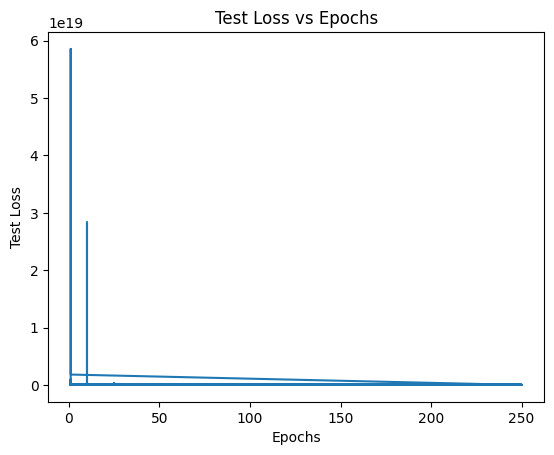

In [ ]:
# Menampilkan model dengan loss terkecil
best_result = results_df.loc[results_df['Test Loss'].idxmin()]
print(f"Best Model: {best_result}")

# Visualisasi Loss vs Epochs untuk model terbaik
plt.plot(results_df['Epochs'], results_df['Test Loss'])
plt.xlabel('Epochs')
plt.ylabel('Test Loss')
plt.title('Test Loss vs Epochs')
plt.show()
